In [1]:
import numpy as np
import seaborn as sns
from nilearn import plotting
from nilearn import datasets
from nilearn import surface
import random

In [14]:

#destrieux_atlas = datasets.fetch_atlas_surf_destrieux()
msdl_atlas_dataset = datasets.fetch_atlas_msdl()

# The parcellation is already loaded into memory
#parcellation = destrieux_atlas['map_left']
parcellation = msdl_atlas_dataset['map_left']

fsaverage = datasets.fetch_surf_fsaverage()

#atlas = destrieux_atlas
atlas = msdl_atlas_dataset
coordinates = []
#labels = destrieux_atlas['labels']
labels = msdl_atlas_dataset['labels']
for hemi in ['left', 'right']:
#    vert = destrieux_atlas['map_%s' % hemi]
    vert = msdl_atlas_dataset['map_%s' % hemi]
    rr, _ = surface.load_surf_mesh(fsaverage['pial_%s' % hemi])
    for k, label in enumerate(labels):
        if "Unknown" not in str(label):  # Omit the Unknown label.
            # Compute mean location of vertices in label of index k
            coordinates.append(np.mean(rr[vert == k], axis=0))

coordinates = np.array(coordinates)  # 3D coordinates of parcels

# We now make a synthetic connectivity matrix that connects labels
# between left and right hemispheres.
n_parcels = len(coordinates)
corr = np.zeros((n_parcels, n_parcels))
n_parcels_hemi = n_parcels // 2
corr[np.arange(n_parcels_hemi), np.arange(n_parcels_hemi) + n_parcels_hemi] = 1
corr = corr + corr.T

plotting.plot_connectome(corr, coordinates,
                         edge_threshold="90%",
                         title='fsaverage Destrieux atlas')
plotting.show()


Dataset created in /home/xavfunk/nilearn_data/msdl_atlas



 ...done. (1 seconds, 0 min)
Extracting data from /home/xavfunk/nilearn_data/msdl_atlas/8eaecb9e05c478f565847000d9902a25/MSDL_rois.zip..... done.


KeyError: 'map_left'

In [16]:
msdl_labels = msdl_atlas_dataset.labels
msdl_coords = msdl_atlas_dataset.region_coords

In [43]:
#n_parcels = len(msdl_coords)
n_parcels = len(coordinates)

<AxesSubplot:>

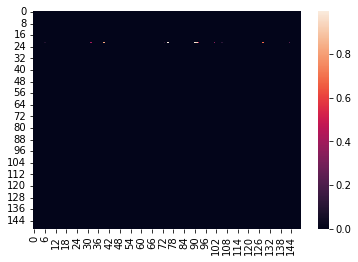

In [121]:
corr = np.zeros((n_parcels, n_parcels))
n = random.randint(0, 30) 
m = n_parcels - n

# vector of n zeros an m ones
vector = np.hstack((np.random.rand(n), np.zeros(m)))
#vector = np.array([1] * n + [0] * m)

# shuffle
np.random.shuffle(vector)

corr[21, :] = vector

# shuffle
np.random.shuffle(vector)

#corr[:, 45] = vector

sns.heatmap(corr)


In [42]:
labels.index(b'G_oc-temp_lat-fusifor')

21

In [57]:
coordinates[corr[21, :].astype(bool)]


array([[ -4.4030004 , -83.13529   ,  17.716713  ],
       [-40.023712  ,  -5.7718463 ,  -2.641215  ],
       [-57.9871    , -37.77158   ,  16.881683  ],
       [-30.45334   ,  21.161394  ,  -9.396141  ],
       [-44.83444   , -67.83629   ,   0.66751033],
       [-44.89462   ,   4.987719  ,  26.531004  ],
       [-53.46986   , -35.027016  , -20.04119   ],
       [ 22.20536   ,  58.378902  ,  -9.815341  ],
       [ 38.281597  ,  32.65817   ,  32.77641   ],
       [ 37.049927  ,   6.2383623 ,  10.185592  ],
       [ 29.928904  , -47.783638  , -13.0757885 ],
       [  5.778527  ,  43.376263  , -14.362411  ]], dtype=float32)

In [62]:
corr[21, corr[21, :].nonzero()].flatten()

array([0.04081956, 0.59880835, 0.40196868, 0.27870795, 0.42750844,
       0.9021597 , 0.54866906, 0.73926622, 0.51313047, 0.08699063,
       0.96257405, 0.71903434])

In [70]:
parcellation = destrieux_atlas['map_left']
parcellation.shape

(10242,)

In [71]:
dataset_ho = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
dataset_ju = datasets.fetch_atlas_juelich('maxprob-thr0-1mm')


Dataset created in /home/xavfunk/nilearn_data/fsl



Downloaded 25354240 of 25716861 bytes (98.6%,    0.4s remaining) ...done. (30 seconds, 0 min)
Extracting data from /home/xavfunk/nilearn_data/fsl/245b1ae3f43e3ea47e2ed9f438694f4a/HarvardOxford.tgz..... done.


Downloaded 3203072 of 3740787 bytes (85.6%,    0.5s remaining) ...done. (4 seconds, 0 min)
Extracting data from /home/xavfunk/nilearn_data/fsl/ab1b53038e13028e55f691a69003c208/Juelich.tgz..... done.


In [87]:
dataset_ho.labels#.index('Parahippocampal Gyrus, anterior division')#'Occipital Fusiform Gyrus')

['Background',
 'Frontal Pole',
 'Insular Cortex',
 'Superior Frontal Gyrus',
 'Middle Frontal Gyrus',
 'Inferior Frontal Gyrus, pars triangularis',
 'Inferior Frontal Gyrus, pars opercularis',
 'Precentral Gyrus',
 'Temporal Pole',
 'Superior Temporal Gyrus, anterior division',
 'Superior Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, anterior division',
 'Middle Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, temporooccipital part',
 'Inferior Temporal Gyrus, anterior division',
 'Inferior Temporal Gyrus, posterior division',
 'Inferior Temporal Gyrus, temporooccipital part',
 'Postcentral Gyrus',
 'Superior Parietal Lobule',
 'Supramarginal Gyrus, anterior division',
 'Supramarginal Gyrus, posterior division',
 'Angular Gyrus',
 'Lateral Occipital Cortex, superior division',
 'Lateral Occipital Cortex, inferior division',
 'Intracalcarine Cortex',
 'Frontal Medial Cortex',
 'Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)',
 'Subcallo

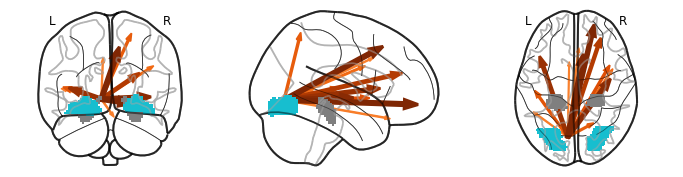

In [124]:
from matplotlib import cm
fig, ax = plt.subplots(figsize = (12, 3))
plotting.plot_connectome(corr, coordinates, # msdl_coords, #coordinates,
                         edge_threshold="90%", axes = ax, edge_cmap = cm.Oranges,
                        node_size = 0)
plot_region([35, 40], dataset_ho.maps, axes = ax, alpha = 0.5)

In [98]:
ax

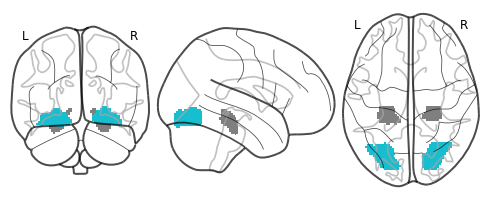

In [102]:
plot_region([35, 40], dataset_ho.maps)

In [100]:
import matplotlib.pyplot as plt
import nibabel as nib
def plot_region(ids, maps, cmap = plt.cm.tab10, axes = None, no_background = False, **kwargs):
    try:
        assert type(maps) == tuple
        multiple_maps = True
    except AssertionError:
        multiple_maps = False
    
    
    if multiple_maps == False:
        
        affine = maps.affine
        img = maps.dataobj
        header = maps.header

        try:  # check for iterable
            iter(ids)
        except TypeError: # make list
            ids = [ids]

        # choose regions
        plot_img = np.zeros(img.shape)

        for j, i in enumerate(ids):
            plot_img += np.where(img == i, j+1, 0)
    
    else:
        if isinstance(ids, tuple) is False:
            raise ValueError('Expected ids to be tuple, since two maps were given')
        
        # unpack tuple
        ids1, ids2 = ids
        maps1, maps2 = maps
        img = maps1.dataobj
        
        plot_img = np.zeros(img.shape)
        
#        for ids, maps in zip([ids1, ids2], [maps1, maps2]):
        j = 2
        for ids, maps in zip(ids, maps):

            affine = maps.affine
            img = maps.dataobj
            header = maps.header

            try:  # check for iterable
                iter(ids)
            except TypeError: # make list
                ids = [ids]

            # choose regions
 #           plot_img = np.zeros(img.shape)

#            for j, i in enumerate(ids):
            for i in ids:
    
                print(j,i)
                region = np.where(img == i, True, False)
                plot_img[region] = j
                j += 1
    
    #print(plot_img.)
    nifti_plot = nib.Nifti1Image(plot_img, affine=affine, header = header)
    if no_background is True:
        plotting.plot_roi(nifti_plot, axes = axes, cmap = cmap, bg_img = None, **kwargs)

#    plotting.plot_roi(nifti_plot, axes = axes, cmap = cmap, **kwargs)
    plotting.plot_glass_brain(nifti_plot, axes = axes, cmap = cmap, **kwargs)
    